In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

encoded = pd.read_parquet('../cache/prepd_0q.parquet')
encoded.head()

,AvgTone,GoldsteinScale,NumSources,NumArticles,Actor1Country_enc,Actor1GeoCountry_enc,Actor1Type_enc,Actor2Country_enc,Actor2GeoCountry_enc,Actor2Type_enc,ActionCountry_enc,EventType_enc,pct_change_30min
Date,,,,,,,,,,,,,
2019-01-01 00:00:00,-1.152286,-0.771788,-0.184615,-0.113108,0.127864,-1.434100,-1.578934,0.164392,-1.784813,0.190843,-1.409427,0.795094,-0.226363
2019-01-01 00:15:00,0.716626,-1.277835,3.176668,3.491856,0.127864,0.969019,0.218327,0.164392,0.209139,0.190843,0.956949,-0.027327,-2.578560
2019-01-01 00:30:00,-0.275271,-1.277835,4.297096,2.290202,0.127864,0.969019,0.218327,0.164392,0.209139,0.190843,0.956949,-0.027327,-1.509301
2019-01-01 00:45:00,3.460546,0.982507,-0.744829,-0.353439,0.127864,-1.834620,0.218327,0.164392,0.209139,0.190843,-1.803824,0.795094,0.781614
2019-01-01 01:00:00,0.350195,-1.277835,-0.184615,-0.113108,0.127864,-0.232540,2.914218,0.164392,0.873790,0.190843,-0.226239,-0.027327,-0.291943


In [12]:
encoded.dtypes

AvgTone                 float64
GoldsteinScale          float64
NumSources              float64
NumArticles             float64
Actor1Country_enc       float64
Actor1GeoCountry_enc    float64
Actor1Type_enc          float64
Actor2Country_enc       float64
Actor2GeoCountry_enc    float64
Actor2Type_enc          float64
ActionCountry_enc       float64
EventType_enc           float64
pct_change_30min        float64
dtype: object

In [13]:
numerical_columns = encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_columns = merged.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target variable from the lists if present
# numerical_columns = [col for col in numerical_columns if col != 'pct_change_30min']


In [14]:
# Compute correlations between numerical columns and the numerical target variable (pearson)
correlations = encoded[numerical_columns].corr()
correlations_30min = correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
print(correlations_30min)

Actor2Country_enc       0.004835
Actor1GeoCountry_enc    0.002468
ActionCountry_enc       0.002074
Actor1Type_enc          0.001945
NumSources              0.001786
EventType_enc           0.001356
Actor2Type_enc          0.001057
Actor2GeoCountry_enc    0.000564
GoldsteinScale          0.000044
AvgTone                -0.000671
Actor1Country_enc      -0.001381
NumArticles            -0.001477
Name: pct_change_30min, dtype: float64


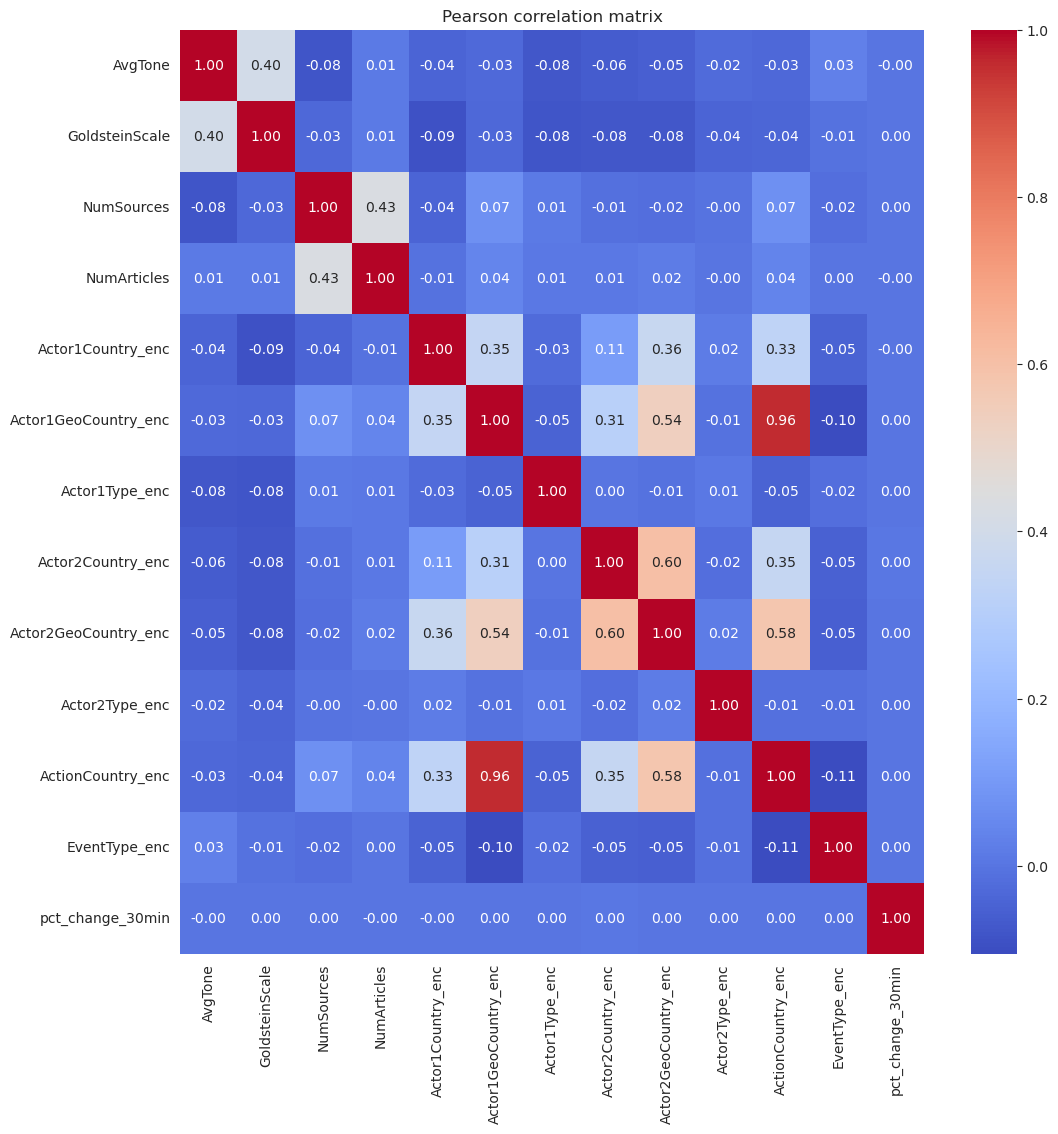

In [15]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson correlation matrix')
plt.show()

In [16]:
# Compute correlations between numerical columns and the numerical target variable (spearman)
spearman_correlations = encoded[numerical_columns].corr(method='spearman')
correlations_30min = spearman_correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
print(correlations_30min)

Actor2Country_enc       0.004456
NumSources              0.002302
Actor2Type_enc          0.001051
Actor1GeoCountry_enc    0.000608
Actor1Type_enc         -0.000173
NumArticles            -0.000641
ActionCountry_enc      -0.001203
EventType_enc          -0.001300
GoldsteinScale         -0.001544
AvgTone                -0.002086
Actor2GeoCountry_enc   -0.002700
Actor1Country_enc      -0.003376
Name: pct_change_30min, dtype: float64


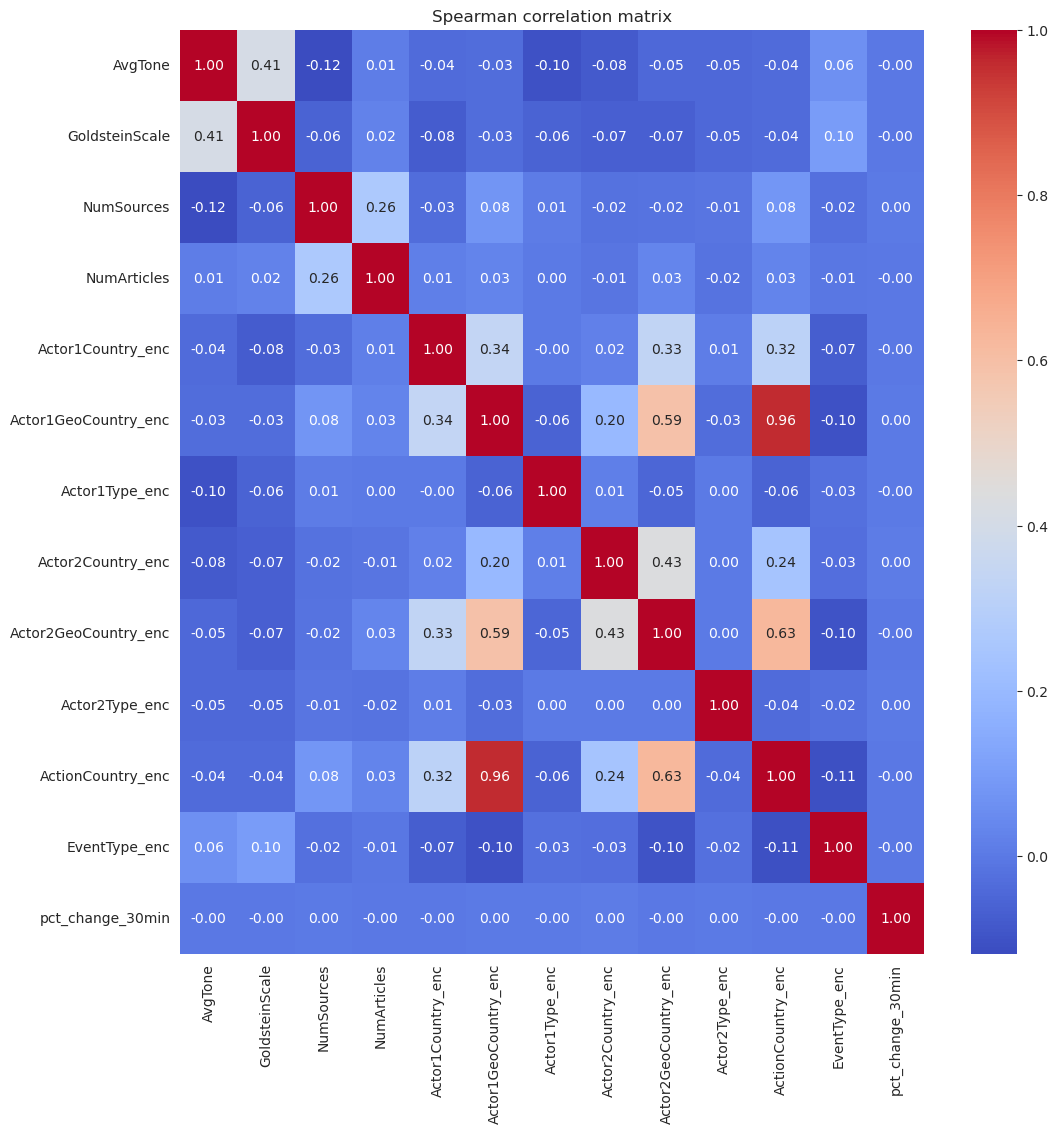

In [17]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman correlation matrix')
plt.show()

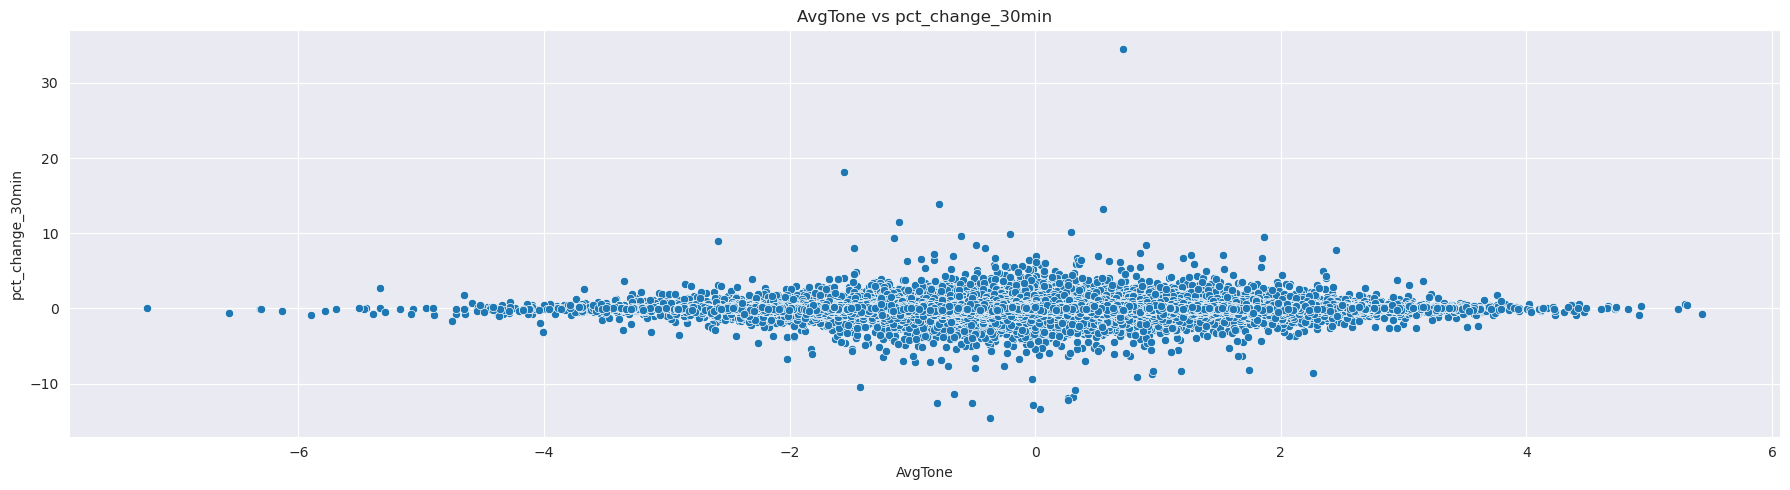

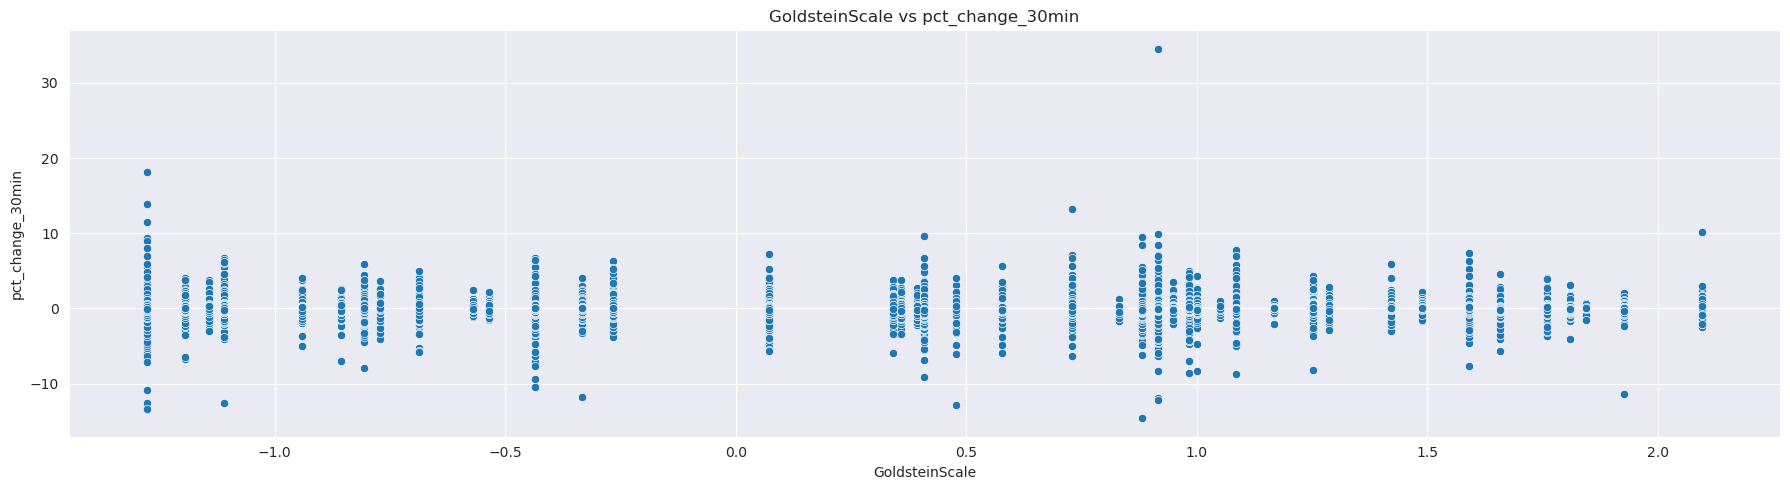

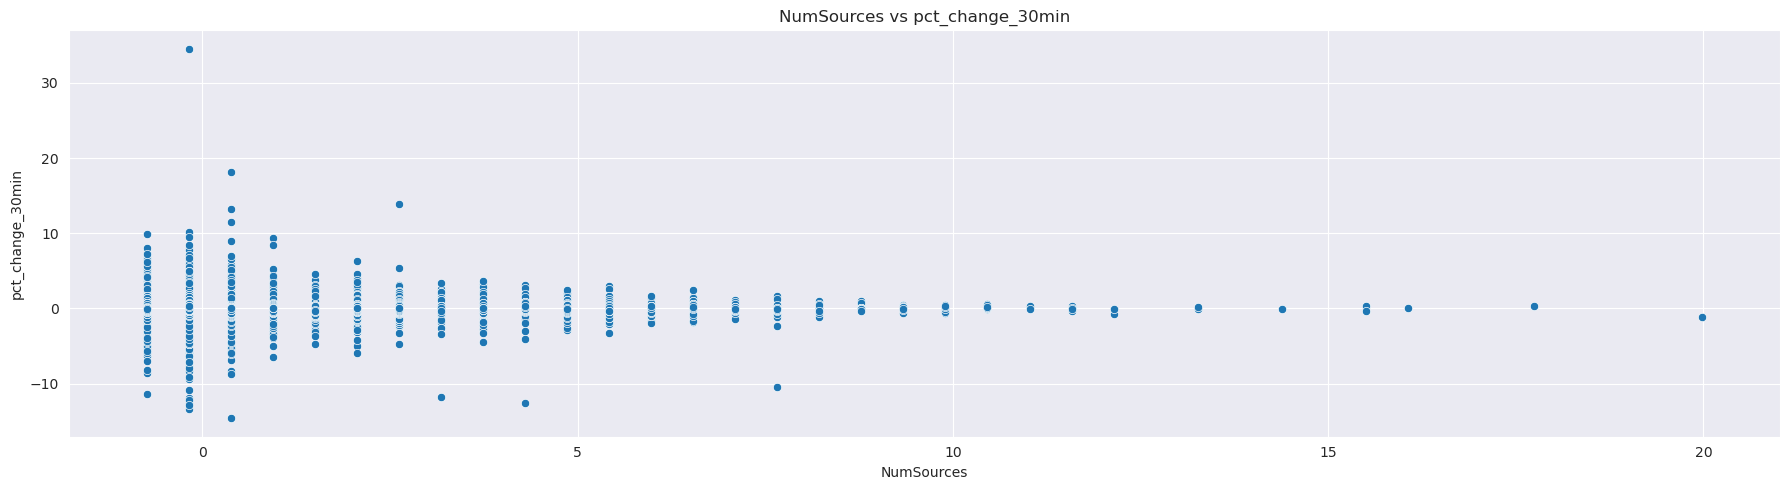

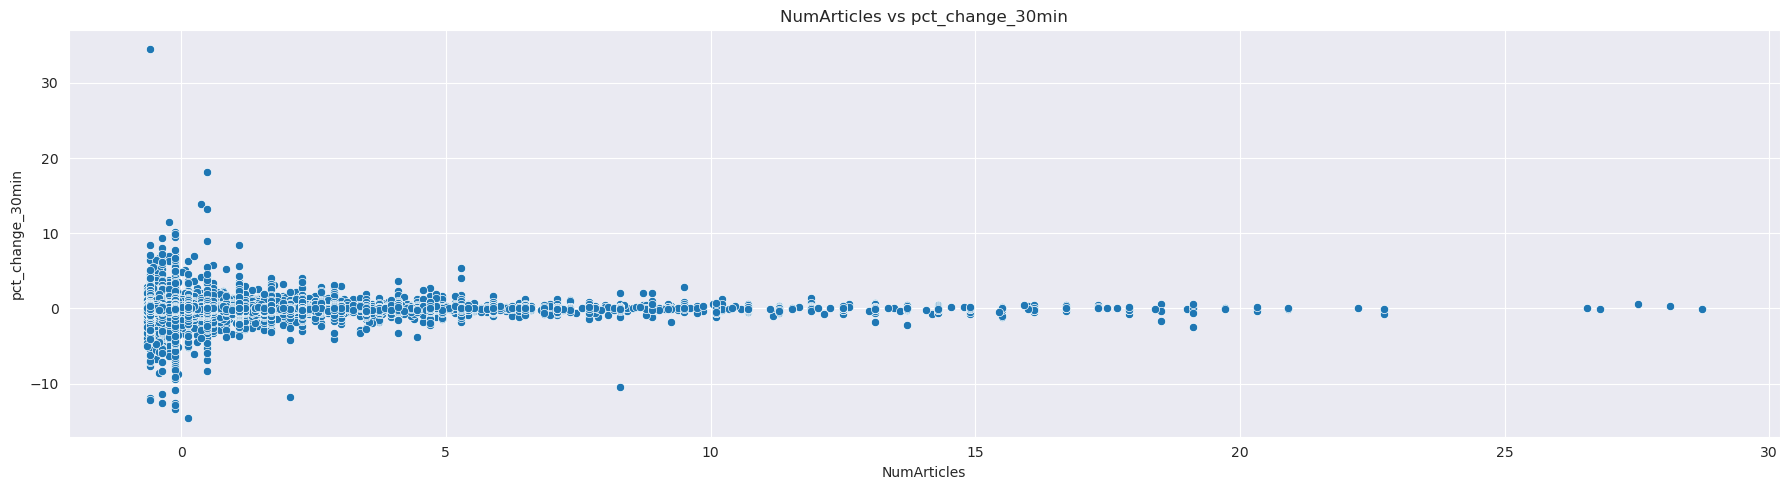

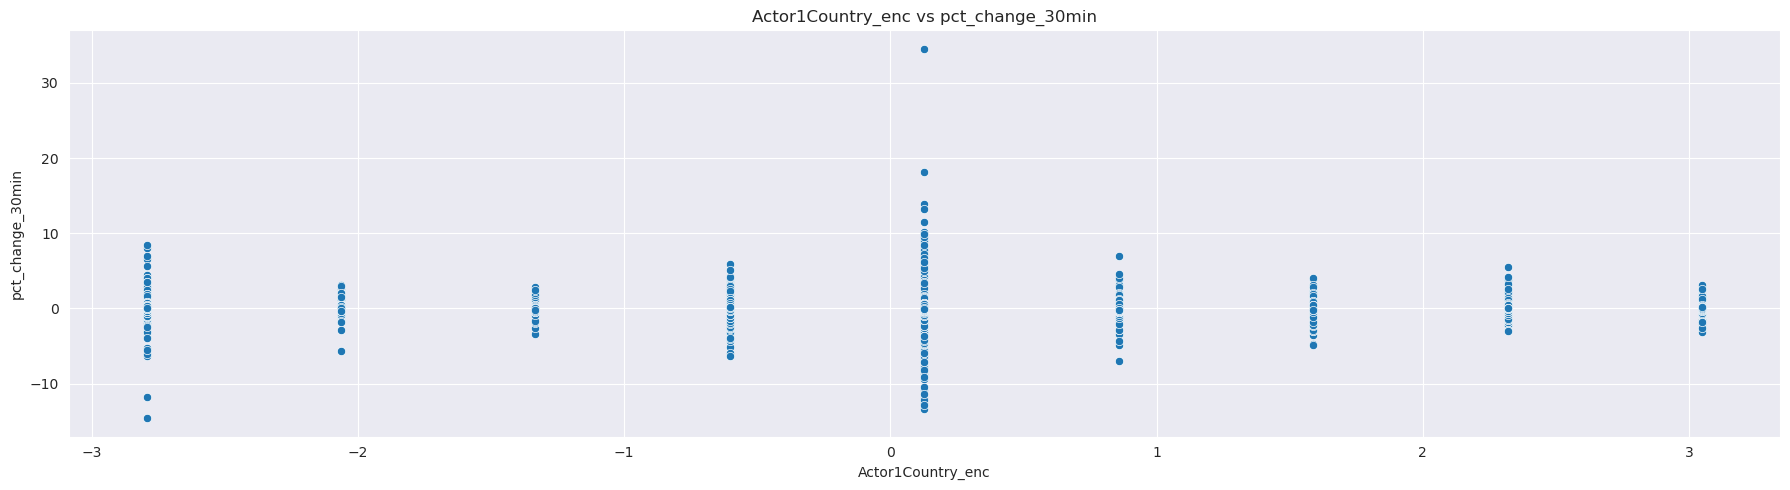

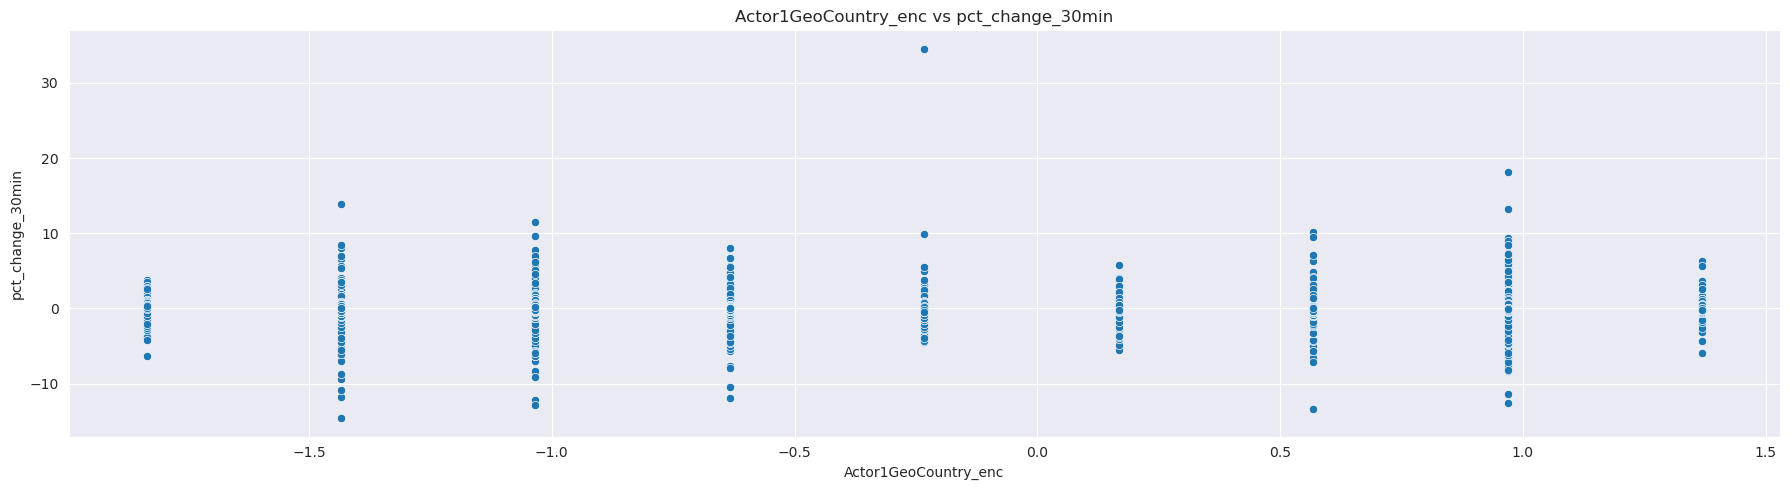

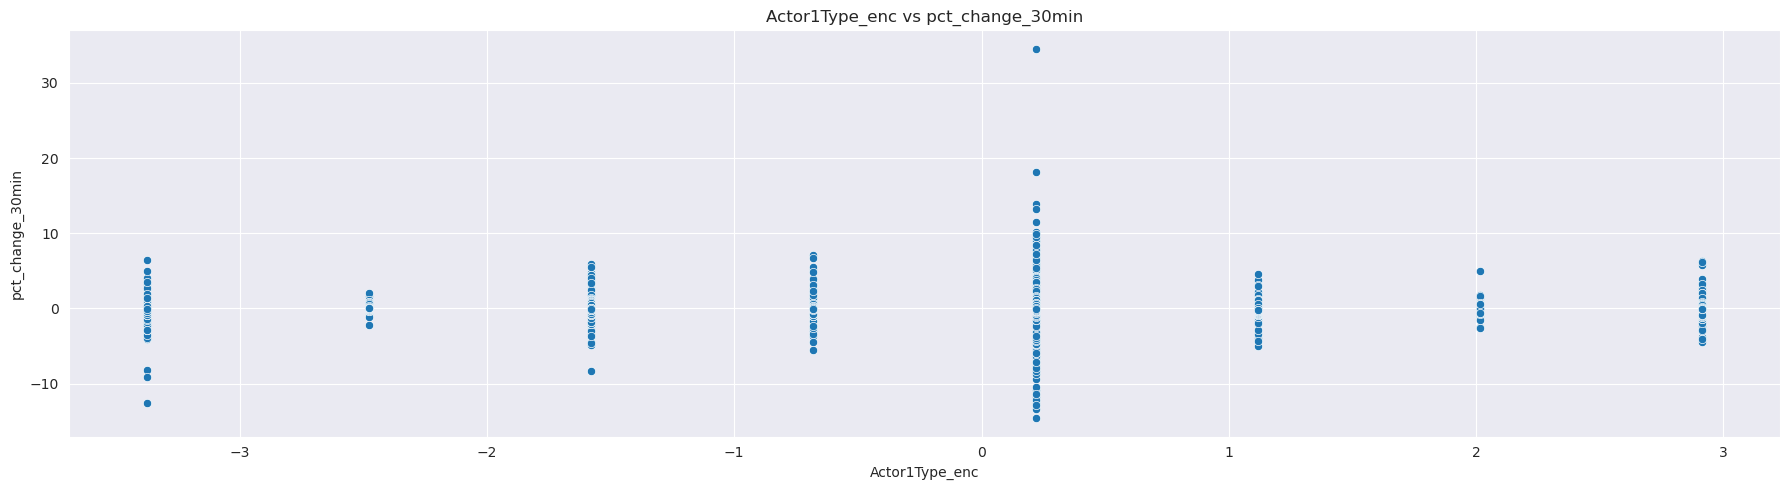

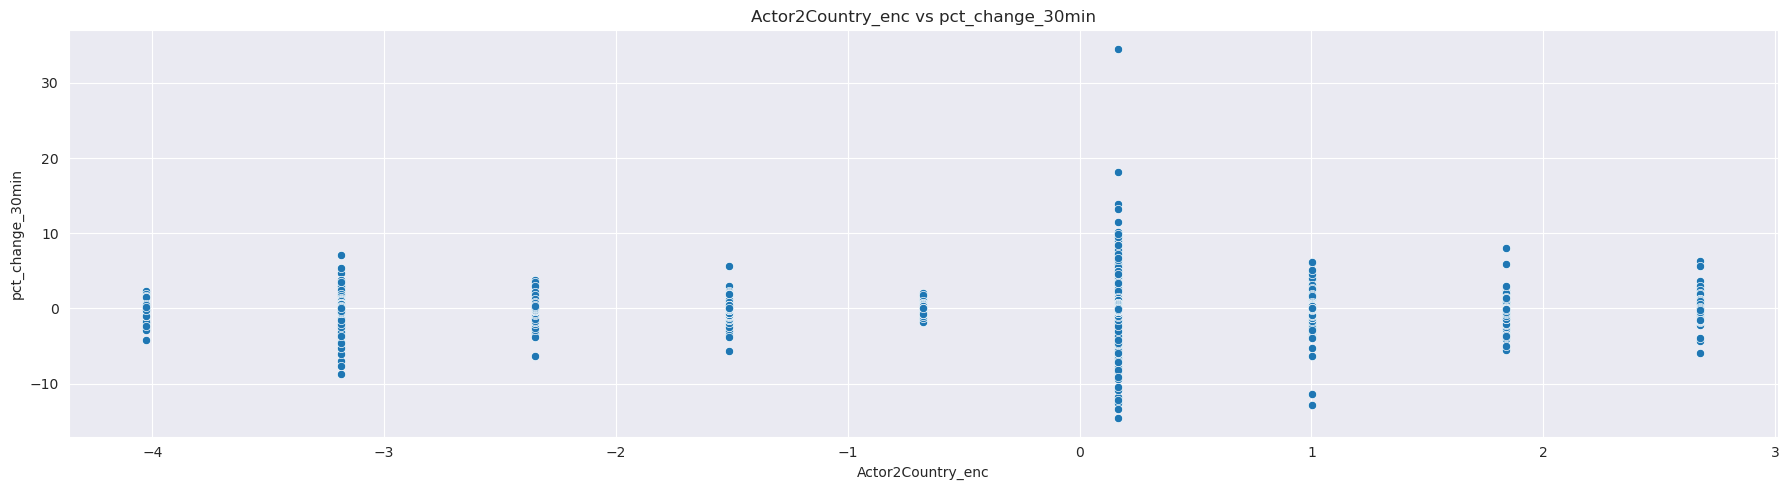

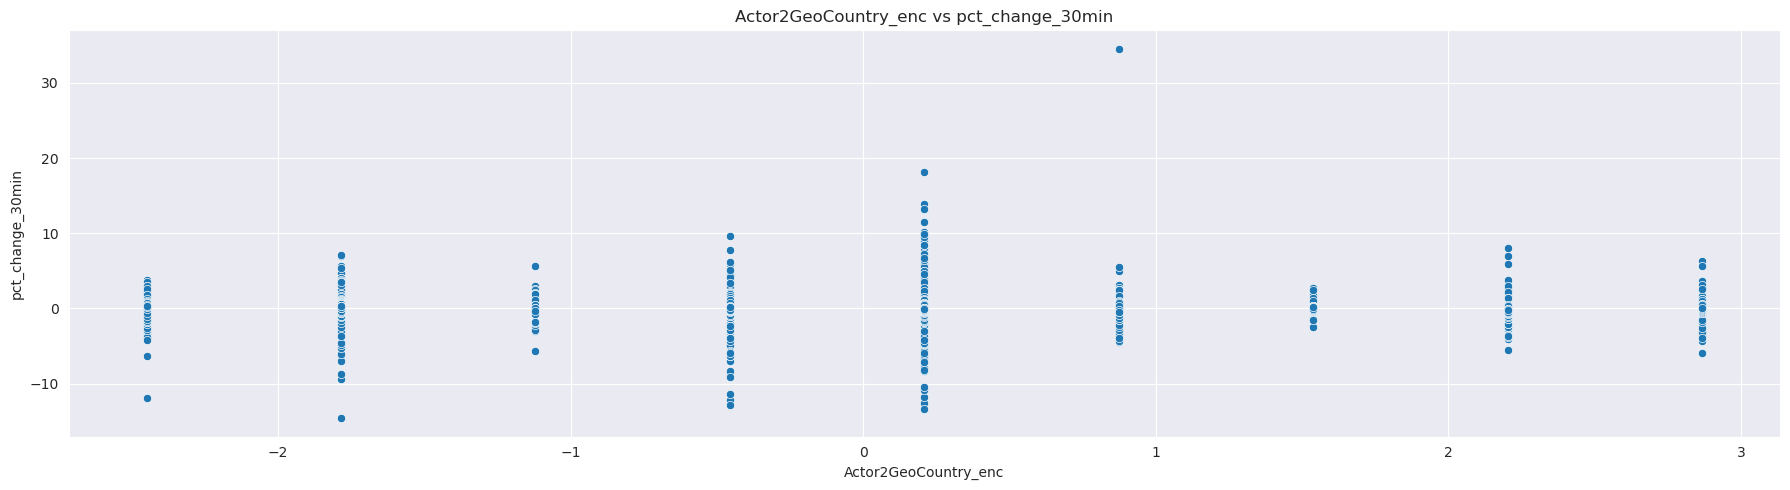

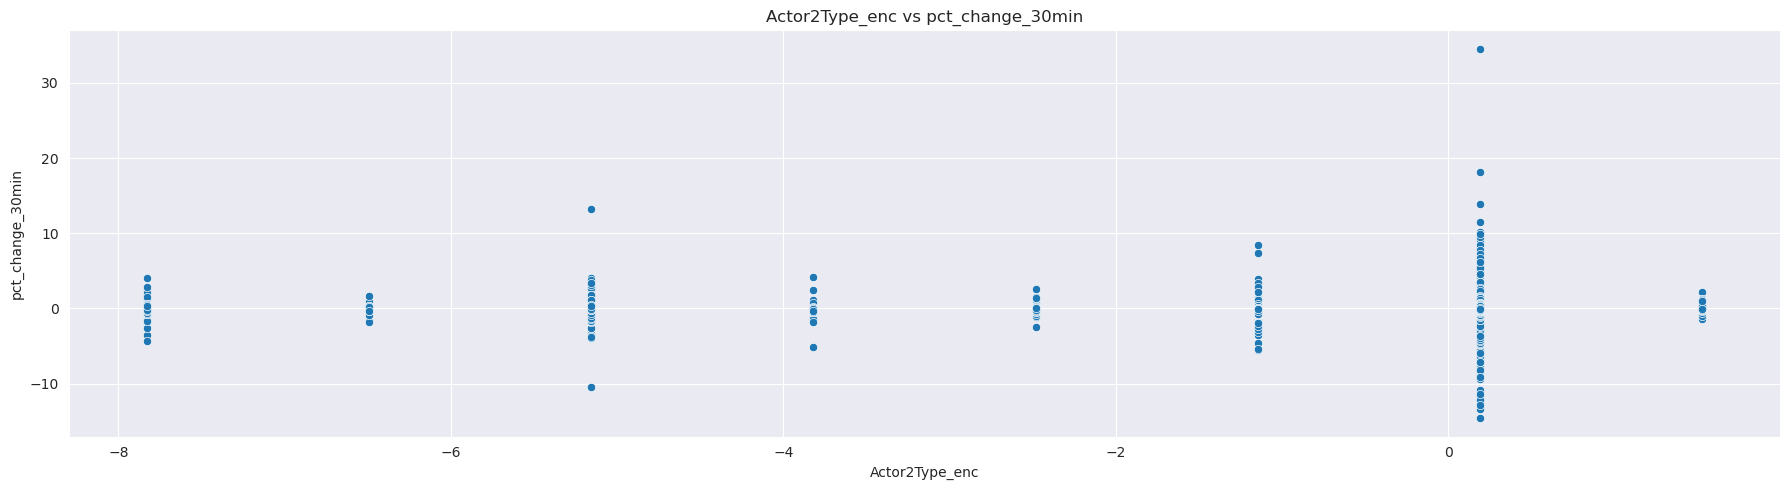

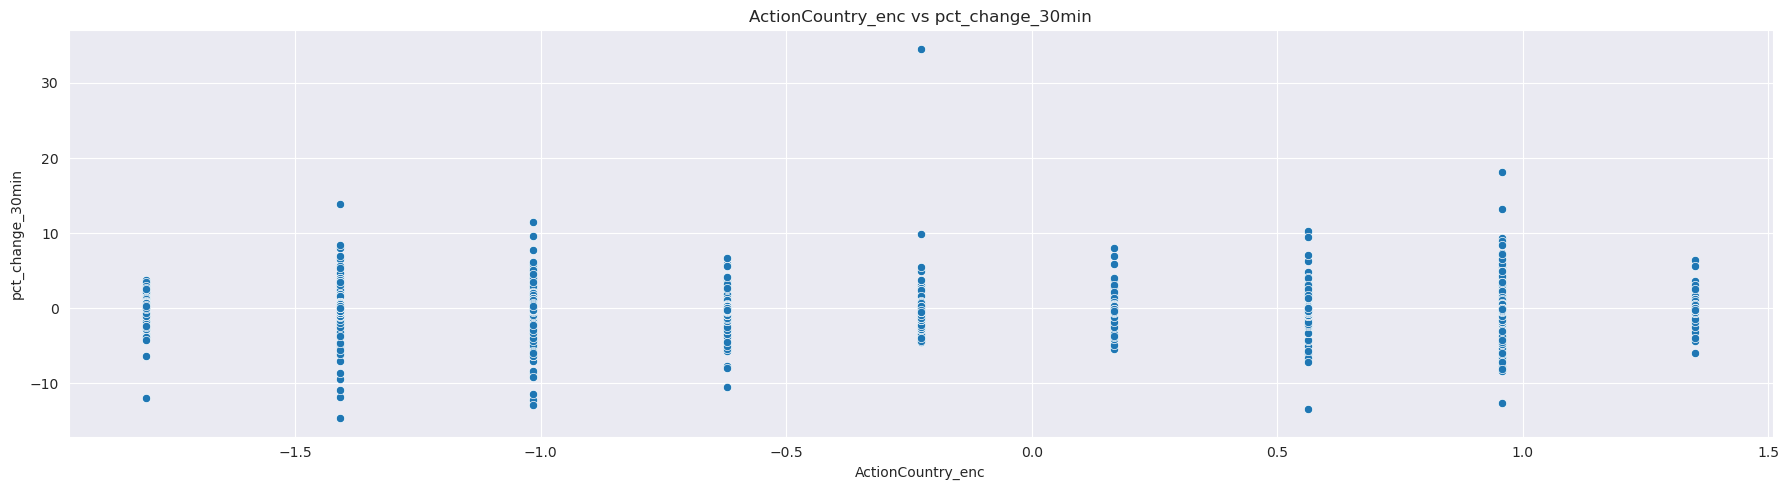

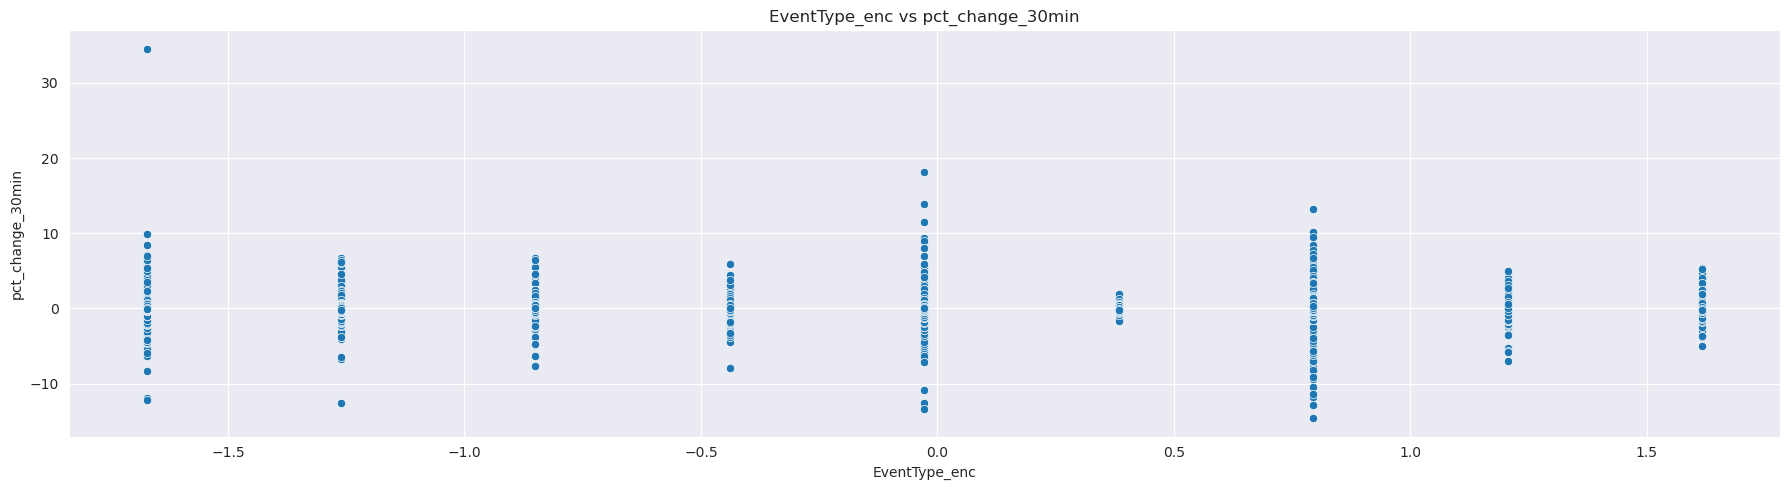

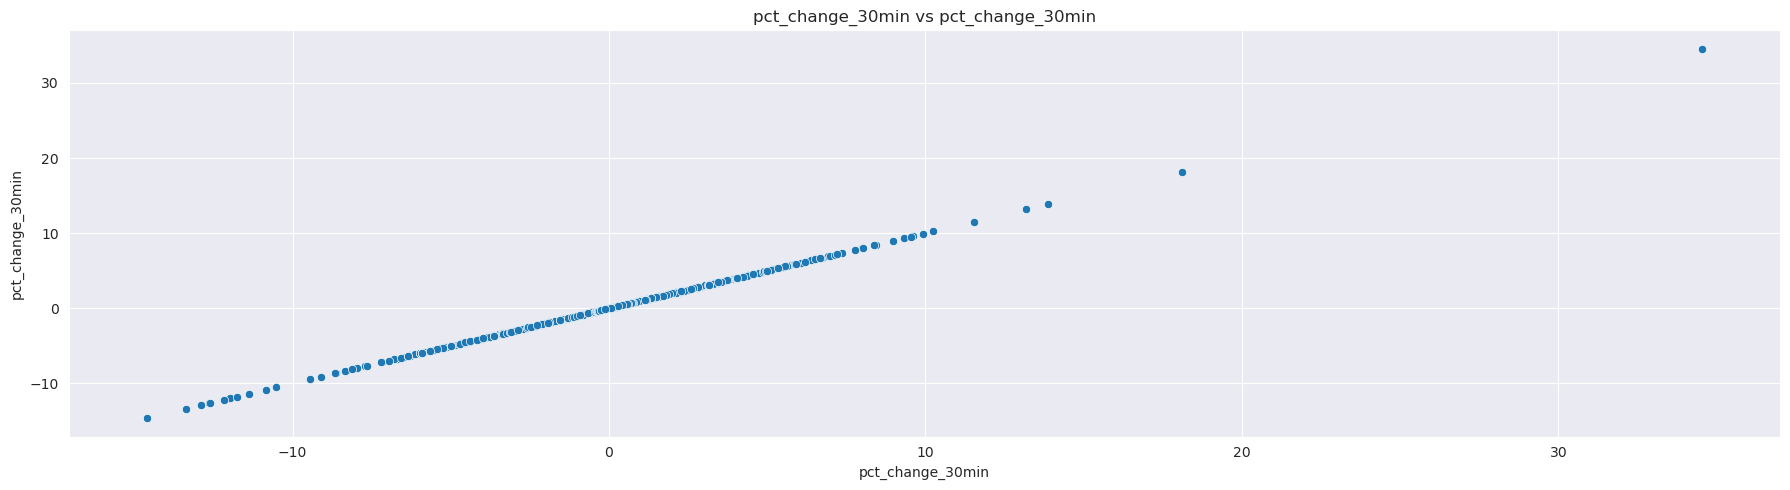

In [18]:
# Plot every column in merged dataframe as a scatter plot against the target variable
for col in numerical_columns:
    fig, ax = plt.subplots(1, 1, figsize=(18, 5))

    sns.scatterplot(ax=ax, x=col, y='pct_change_30min', data=encoded)
    ax.set_title(f'{col} vs pct_change_30min')

    plt.tight_layout()
    plt.show()